<a href="https://colab.research.google.com/github/cowiety/energy-forecast/blob/main/ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import *

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


In [ ]:
# load dataset
def parser(x):
	return datetime.strptime(str(x), '%Y/%m/%d-%H')
 
series = read_csv('PUB_Demand_2021.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('H')
series.drop(series.columns[1], axis=1, inplace=True)
series.head(15)

/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


FileNotFoundError: ignored

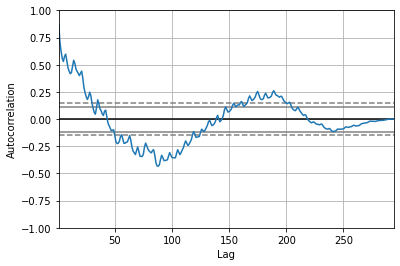

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:      D2.Average Demand   No. Observations:                  292
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -2354.628
Method:                       css-mle   S.D. of innovations            758.633
Date:                Thu, 25 Nov 2021   AIC                           4727.256
Time:                        22:42:55   BIC                           4760.346
Sample:                    01-03-2021   HQIC                          4740.511
                         - 10-21-2021                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0433      0.287     -0.151      0.880      -0.605       0.518
ar.L1.D2.Average Demand    -0.0138      0.149     -0.092      0.927      -0.306       0.278


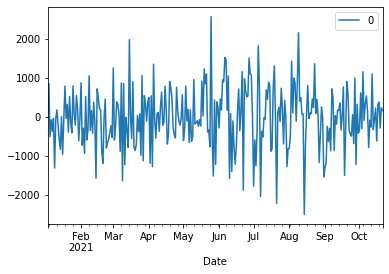

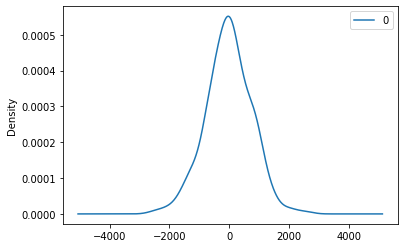

                 0
count   292.000000
mean    -19.951649
std     765.651748
min   -2509.678493
25%    -472.267788
50%     -31.410116
75%     477.168899
max    2576.007770


In [ ]:
# fit model
model = ARIMA(series, order=(5,2,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

2 1 [0.12712533]


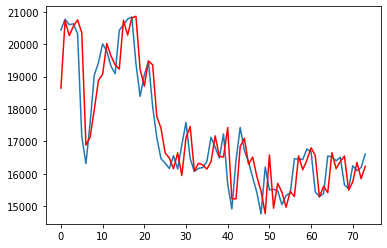

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


2 2 [0.12963784]


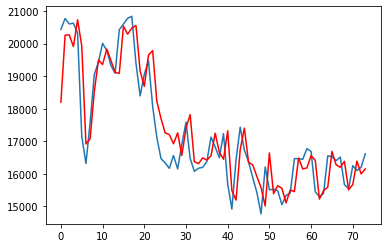

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 1 [0.12730814]


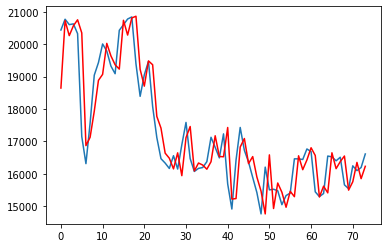

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist

3 2 [0.12903811]


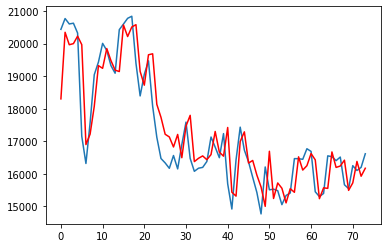

4 1 [0.1247712]


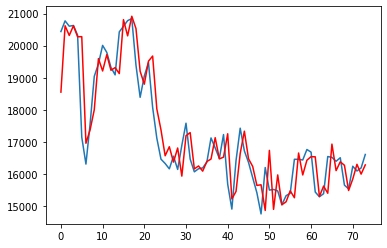

4 2 [0.12782773]


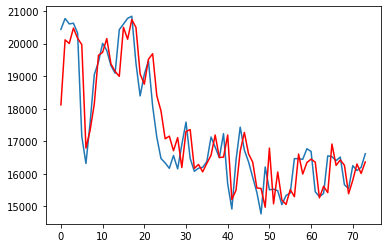

5 1 [0.12144911]


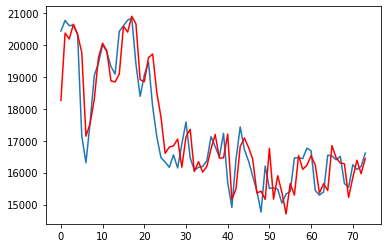

5 2 [0.12164744]


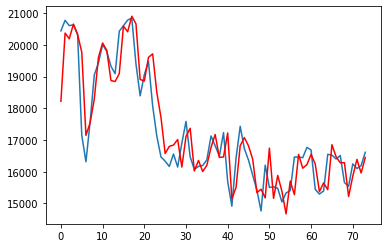

In [ ]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

for i in range(2,6):
	for j in range(1,3):
		history = [x for x in train]
		predictions = list()

		for t in range(len(test)):
			model = ARIMA(history, order=(i,2,j))
			model_fit = model.fit()
			output = model_fit.forecast()
			yhat = output[0]
			predictions.append(yhat)
			obs = test[t]
			history.append(obs)
			#print('predicted=%f, expected=%f' % (yhat, obs))
			#print(yhat)
		
		# evaluate forecasts
		rmse = sqrt(mean_squared_error(test, predictions))
		rmse_normalized = rmse/(max(test)-min(test))
		print(i, j, rmse_normalized)

		# plot forecasts against actual outcomes
		pyplot.plot(test)
		pyplot.plot(predictions, color='red')
		pyplot.show()

In [ ]:
# # Forecast
# fitted = model.fit(disp=-1)
# fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = Series(fc, index=test.index)
lower_series = Series(conf[:, 0], index=test.index)
upper_series = Series(conf[:, 1], index=test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()

# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = Series(fc, index=test.index)
lower_series = Series(conf[:, 0], index=test.index)
upper_series = Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: ignored